Create python definitions of the following 5 functions and their derivatives:

$f(x) = ln(x^3)$

$f(x) = exp(x^{1/3})$

$f(x) = x^2 sin(x)$

$f(x) = \frac{\sqrt{2}}{sin(x) cos(x)}$

$f(x) = \sigma(x)$ // this is the sigmoid function, important historically for neural nets

In [0]:
# LAMBDA SCHOOL
#
# MACHINE LEARNING
#
# MIT LICENSE

# Your code goes here...

Plot the above five functions each on separate plots.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


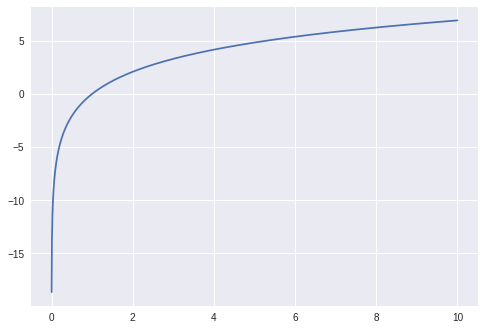

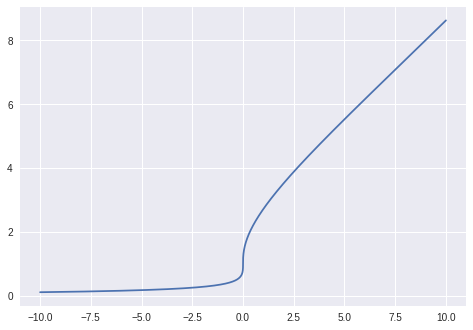

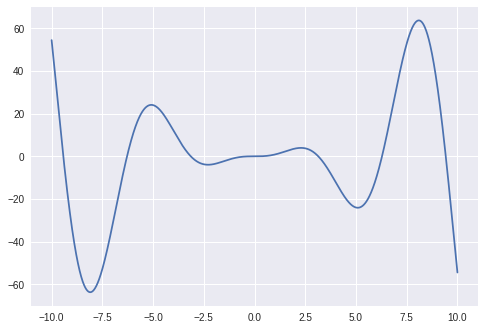

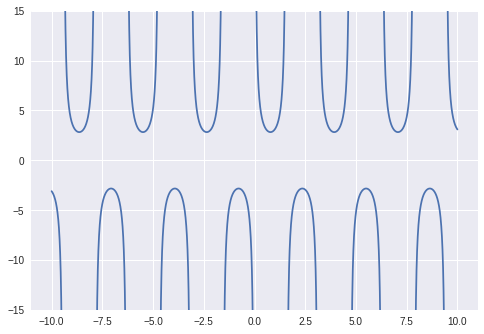

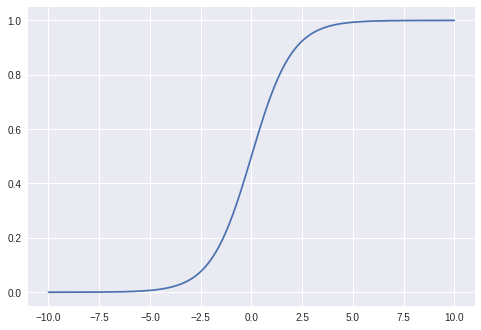

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Your code goes here

def f_1(x):
    return np.log(np.power(x, 3))

def f_2(x):
    return np.exp(np.cbrt(x))

def f_3(x):
    return x**2 * np.sin(x)

def f_4(x):
    return np.sqrt(2) / (np.sin(x) * np.cos(x))

def f_5(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 5000)

y = f_1(x)
plt.plot(x, y);
plt.show()

y = f_2(x)
plt.plot(x, y);
plt.show()

y = f_3(x)
plt.plot(x, y);
plt.show()

y = f_4(x)
upper_lim = 100
lower_lim = -100
y[y>upper_lim] = np.inf
y[y<lower_lim] = -np.inf
plt.plot(x, y);
plt.ylim((-15, 15))
plt.show()

y = f_5(x)
plt.plot(x, y);
plt.show()

Where is the derivative of each function equal to zero?

Visually, where the plot of the function is flat, such as in a local minimum or maximum, or another point of zero slope such as the point (0,0) in  $ f(x) = x^3 $

By inspection, we can see that f_1, f_2, and f_5 have no such places where the derivative equals zero, f_4 seems to have infinitely many that show up in a periodic fashion, and f_3 also has many, though it is not clear from the plot if there are infinitely many.

---

Analytically:

$ \frac{df_1(x)}{dx} = \frac{1}{x^3} * \frac{d}{dx}(x^3) $

$ = \frac{1}{x^3} * 3x^2 $

$ = \frac{3}{x}, x>0 $

While the derivative of f_1(x) approaches zero as x approaches infinity, it is never equal to zero.

---

$ \frac{df_2(x)}{dx} = exp(x^{1/3}) * \frac{d}{dx}(x^{1/3}) $ 

$ = exp(x^{1/3}) * \frac{x^{-2/3}}{3} $

$ = \frac{exp(x^{1/3})}{3x^{2/3}}, x \neq 0 $ 

The derivative of f_2(x) is never equal to zero.

---

$ \frac{df_3(x)}{dx} = x^2 \frac{d}{dx}(sin(x)) + sin(x)\frac{d}{dx}(x^2) $

$ = x^2 cos(x) + 2xsin(x) $

This derivative function has infinitely many zeros. One at x = 0, and then more whenever $x^2 cos(x) =  2xsin(x)$, or in other terms, $\frac{tan(x)}{x} = \frac{1}{2}$ Since the tangent function is periodic and cycles through all the real numbers, there are infinitely many instances of this.

---

$ \frac{df_4(x)}{dx} = \sqrt{2} \frac{-1}{sin^2(x)cos^2(x)}\frac{d}{dx}(sin(x)cos(x)) $

$ = \sqrt{2} \frac{-1}{sin^2(x)cos^2(x)} (-sin^2(x) + cos^2(x)) $

$ = \sqrt{2} \frac{sin^2(x) - cos^2(x)}{sin^2(x)cos^2(x)} $

$ = \sqrt{2}(sec^2(x) - csc^2(x)) $

This derivative is equal to zero whenever $ sec^2(x) = cos^2(x) $, which is equivalent to whenever $ |sin(x)| = |cos(x)| $.
This happens whenever $ x = n\pi - \frac{\pi}{4}, x = n\pi - \frac{3\pi}{4} $ so there are infinitely many zeros.

---

$ \frac{df_4(x)}{dx} = \frac{-1}{(1 + exp(-x))^2} \frac{d}{dx}(1 + exp(-x))$

$ = \frac{-1}{(1 + exp(-x))^2} (-exp(-x)) $

$ = \frac{exp(-x)}{(1 + exp(-x))^2} $

The sigmoid function has derivatives that approach zero as x approaches infinity, and as x approaches negative infinity, but nowhere does the derivative equal exactly zero.

In [46]:
import sympy as sym

def my_ln_prime(a):
    x = sym.Symbol('x')
    y = sym.log(x**3)
    yprime = y.diff(x)
    
    f = sym.lambdify(x, yprime)
    return f(a)

my_ln_prime(1)

3.0